<a href="https://colab.research.google.com/github/jetski-cartier/MLwork/blob/main/Model_Overfitting_jeff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Synthetic data

1500 instances - 0 or 1 - binary problem

class 1 3 Gaussian distribution - [6,14], [10,6][14,14]

class 0 - Uniform distribution - 20


In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt


In [5]:
#matplotlib inline

In [6]:
from numpy.random import random

In [7]:
N=1500

In [8]:
mean1=[6,14]

In [9]:
mean2=[10,6]

In [10]:
mean3=[14,14]

In [11]:
cov=[[3.5, 0],[0,3.5]]

In [12]:
cov

[[3.5, 0], [0, 3.5]]

In [13]:
np.random.seed(50)

In [14]:
X=np.random.multivariate_normal(mean1,cov, int(N/6))

In [15]:
X.shape

(250, 2)

In [16]:
X[0]

array([ 3.0808485 , 13.94204621])

In [17]:
X[:,1].sum()

3447.8139448036873

In [18]:
3447.8139448036873/250

13.79125577921475

In [19]:
X= np.concatenate((X, np.random.multivariate_normal(mean2, cov, int(N/6))))

In [20]:
X.shape

(500, 2)

In [21]:
X= np.concatenate((X, np.random.multivariate_normal(mean3, cov, int(N/6))))

In [22]:
X.shape

(750, 2)

In [23]:
X=np.concatenate((X, 20*np.random.rand(int(N/2), 2)))

In [24]:
X.shape

(1500, 2)

In [25]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [26]:
y=np.concatenate((np.ones(int(N/2)), np.zeros(int(N/2))))

In [27]:
y

array([1., 1., 1., ..., 0., 0., 0.])

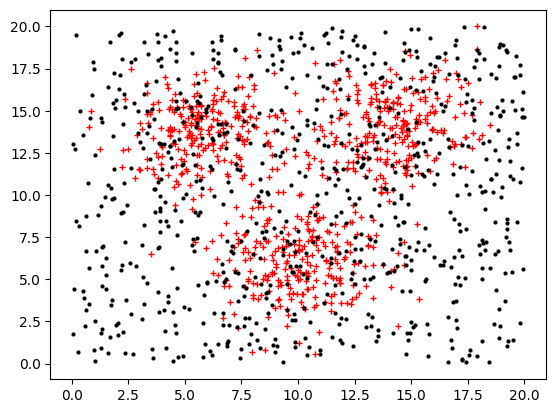

In [28]:
plt.plot(X[:int(N/2), 0], X[:int(N/2),1], 'r+', X[int(N/2):,0],X[int(N/2):,1],'k.', ms=4)

In [29]:
X

array([[ 3.0808485 , 13.94204621],
       [ 4.83834929, 11.2600208 ],
       [ 8.64150932, 13.10811583],
       ...,
       [17.10881966,  8.27100981],
       [ 4.63522923,  4.47963684],
       [ 7.45080691,  0.31260003]])

In [30]:
y

array([1., 1., 1., ..., 0., 0., 0.])

Class--->tuesday 12th march

In [69]:
from sklearn.model_selection import train_test_split


In [70]:
from sklearn.tree import DecisionTreeClassifier


In [71]:
from sklearn import tree

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [74]:
maxDepth=[2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50,55]

In [75]:
testAcc=np.zeros(len(maxDepth))

In [76]:
testAcc

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [77]:
from sklearn.metrics import accuracy_score

# Initialize trainaccuracy and testAcc lists
trainaccuracy = []
testAcc = []

for depth in maxDepth:
    clf = tree.DecisionTreeClassifier(max_depth=depth)

    clf = clf.fit(X_train, y_train)
    y_predictTrain = clf.predict(X_train)
    y_predictTest = clf.predict(X_test)
    # Calculate training accuracy and store it in trainaccuracy list
    trainaccuracy.append(accuracy_score(y_train, y_predictTrain))
    # Calculate test accuracy and store it in testAcc list
    testAcc.append(accuracy_score(y_test, y_predictTest))




In [78]:
trainaccuracy

[0.6391666666666667,
 0.6825,
 0.7241666666666666,
 0.735,
 0.7666666666666667,
 0.7783333333333333,
 0.7975,
 0.8166666666666667,
 0.8416666666666667,
 0.9175,
 0.97,
 0.9925,
 0.9991666666666666,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [81]:
testAcc

[0.5933333333333334,
 0.6366666666666667,
 0.71,
 0.7166666666666667,
 0.7533333333333333,
 0.7366666666666667,
 0.7333333333333333,
 0.7266666666666667,
 0.7233333333333334,
 0.74,
 0.7466666666666667,
 0.6966666666666667,
 0.72,
 0.72,
 0.7133333333333334,
 0.7133333333333334,
 0.7166666666666667,
 0.7266666666666667]

In [83]:
import matplotlib.pyplot as plt

In [84]:
%matplotlib inline

<ipython-input-85-5f969e66fc95>:2: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  plt.legend("Training Accuracy","Test Accuracy")


Text(0, 0.5, 'Accuracy')

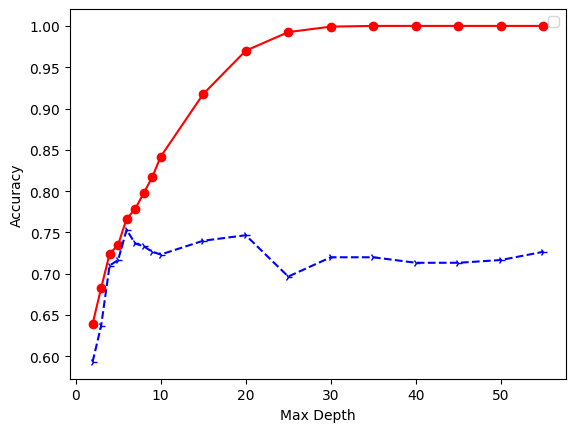

In [85]:
plt.plot(maxDepth, trainaccuracy, 'ro-',maxDepth,testAcc,'b4--')
plt.legend("Training Accuracy","Test Accuracy")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")

how do you tell the highest point is 6?